In [347]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib 

In [348]:
df1=pd.read_csv("tested.csv")
df=df1.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [349]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [350]:
# first i want to rename the columns names
df = df.rename(columns={
    "PassengerId": "ID",
    "Survived": "SurvivalStatus",
    "Pclass": "PassengerClass",
    "Name": "FullName",
    "Sex": "Gender",
    "Age": "Age",
    "SibSp": "SiblingsSpouses",
    "Parch": "ParentsChildren",
    "Ticket": "TicketNumber",
    "Fare": "TicketFare",
    "Cabin": "CabinNumber",
    "Embarked": "BoardingPort"
})
df.columns

Index(['ID', 'SurvivalStatus', 'PassengerClass', 'FullName', 'Gender', 'Age',
       'SiblingsSpouses', 'ParentsChildren', 'TicketNumber', 'TicketFare',
       'CabinNumber', 'BoardingPort'],
      dtype='object')

In [351]:
df.drop(columns=["ID", "FullName", "SiblingsSpouses", "ParentsChildren", "TicketNumber", "CabinNumber", "BoardingPort"], inplace=True)


In [352]:
df

,SurvivalStatus,PassengerClass,Gender,Age,TicketFare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
...,...,...,...,...,...
413,0,3,male,NaN,8.0500
414,1,1,female,39.0,108.9000
415,0,3,male,38.5,7.2500
416,0,3,male,NaN,8.0500


In [353]:
df.isna().sum()

SurvivalStatus     0
PassengerClass     0
Gender             0
Age               86
TicketFare         1
dtype: int64

In [354]:
df.duplicated().value_counts()

False    372
True      46
Name: count, dtype: int64

In [355]:
df=df.drop_duplicates()
df.duplicated().value_counts()

False    372
Name: count, dtype: int64

In [356]:
df.columns

Index(['SurvivalStatus', 'PassengerClass', 'Gender', 'Age', 'TicketFare'], dtype='object')

In [357]:
df.isna().sum()

SurvivalStatus     0
PassengerClass     0
Gender             0
Age               52
TicketFare         1
dtype: int64

In [358]:
for i in df:
    print(df[i].dtype)


int64
int64
object
float64
float64


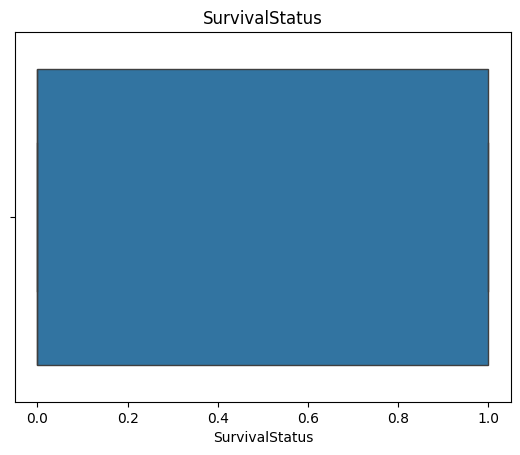

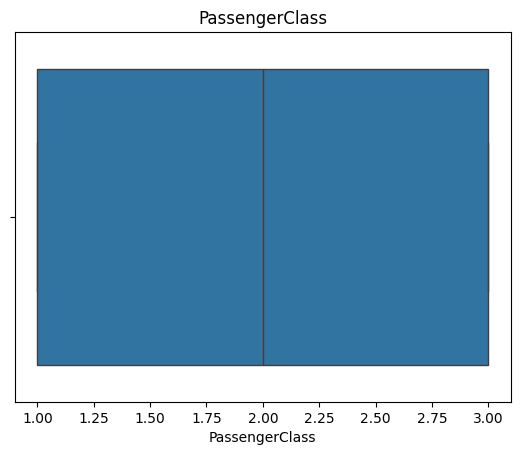

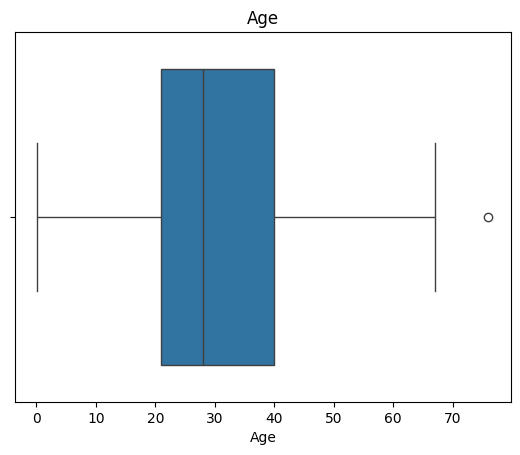

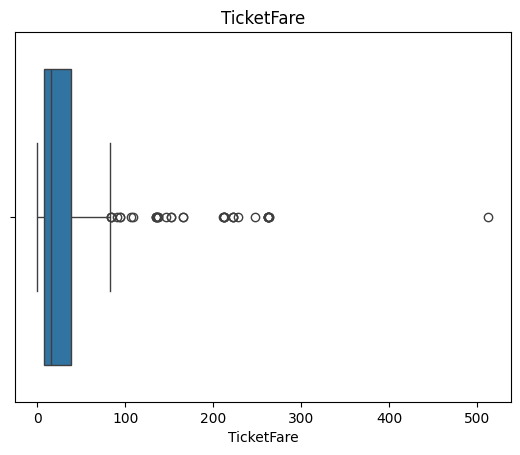

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.title(i)
    plt.show()


In [360]:
%%capture
# Calculate the median of a specific column in the DataFrame and fill missing values
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Calculate the median of another column in the DataFrame and fill missing values
median_fare = df['TicketFare'].median()
df['TicketFare'].fillna(median_fare, inplace=True)


In [361]:
df.isna().sum()

SurvivalStatus    0
PassengerClass    0
Gender            0
Age               0
TicketFare        0
dtype: int64

In [362]:
df.head()

,SurvivalStatus,PassengerClass,Gender,Age,TicketFare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


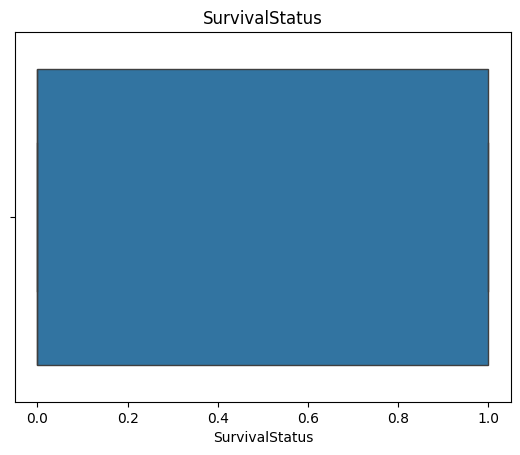

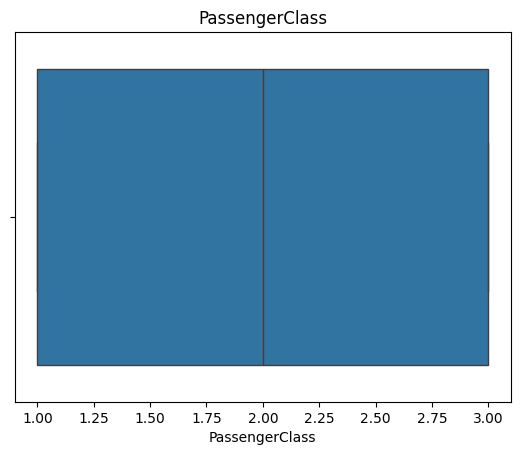

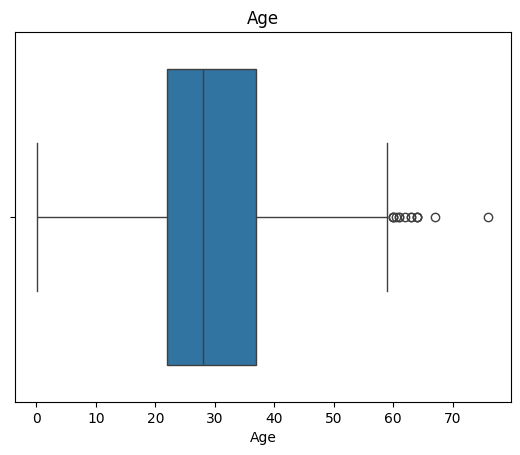

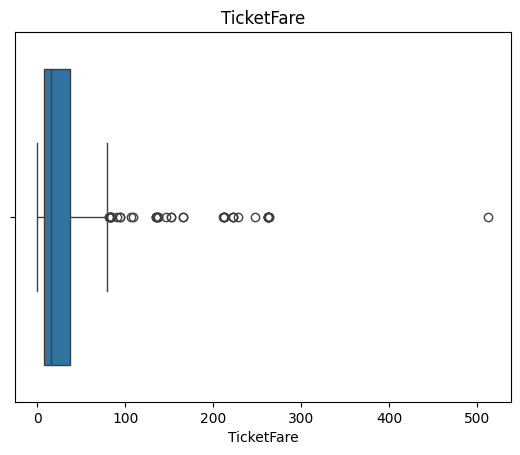

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.title(i)
    plt.show()


In [364]:
%%capture
# Define a function to calculate IQR bounds for outliers
list_1=["Age","TicketFare"]
def out(col):
    q1, q3 = np.percentile(col, [25, 75])  # Calculate the 1st and 3rd quartiles
    iqr = q3 - q1                          # Calculate the interquartile range (IQR)
    lw = q1 - 1.5 * iqr                    # Lower bound for outliers
    uw = q3 + 1.5 * iqr                    # Upper bound for outliers
    return lw, uw

# Loop over each numeric column and cap the outliers
for i in list_1:
    lw, uw = out(df[i])  # Get lower and upper bounds for the column
    df[i] = np.where(df[i] < lw, lw, df[i])  # Cap values below the lower bound
    df[i] = np.where(df[i] > uw, uw, df[i]) # Cap values above the upper bound


In [365]:
df

,SurvivalStatus,PassengerClass,Gender,Age,TicketFare
0,0,3,male,34.5,7.82920
1,1,3,female,47.0,7.00000
2,0,2,male,59.5,9.68750
3,0,3,male,27.0,8.66250
4,1,3,female,22.0,12.28750
...,...,...,...,...,...
411,1,1,female,37.0,81.72975
412,1,3,female,28.0,7.77500
414,1,1,female,39.0,81.72975
415,0,3,male,38.5,7.25000


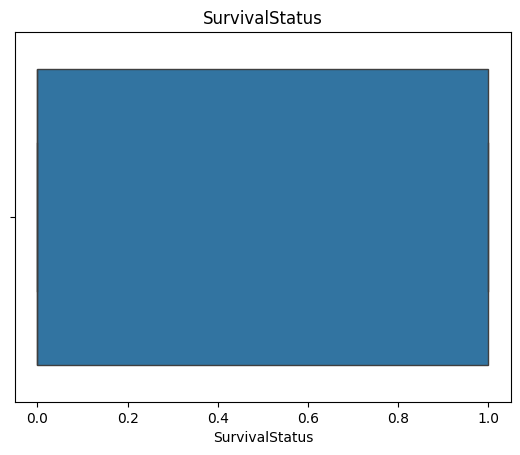

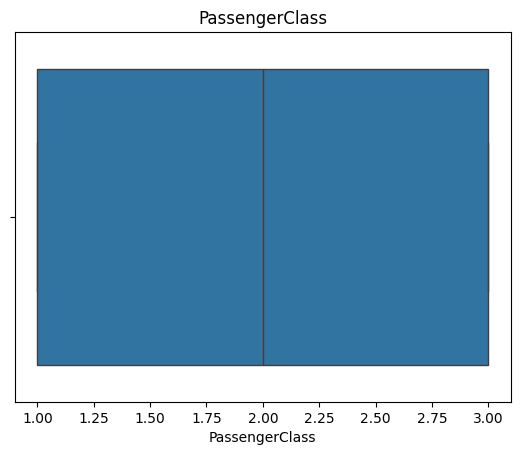

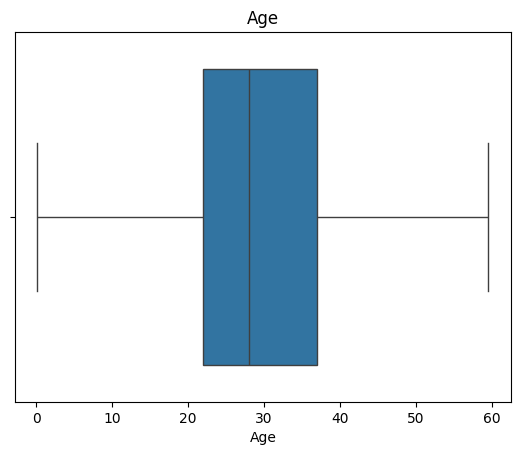

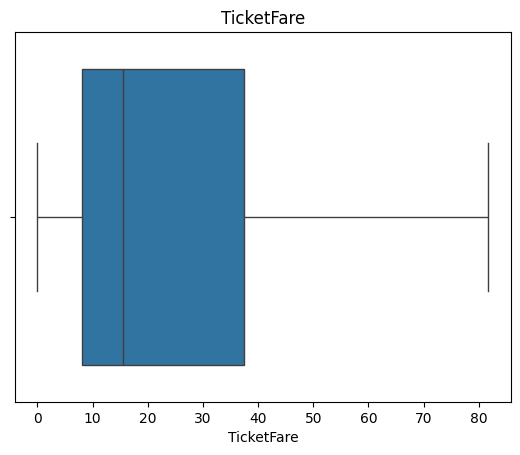

In [366]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.title(i)
    plt.show()

In [367]:
df.head()

,SurvivalStatus,PassengerClass,Gender,Age,TicketFare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,59.5,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [368]:
# now we Have to convert categorigal data to numerical data
from  sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [369]:
%%capture
for i in df.select_dtypes(include="object"):
  df[i]=lr.fit_transform(df[i])

In [370]:
df.head()

,SurvivalStatus,PassengerClass,Gender,Age,TicketFare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,59.5,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


In [371]:
# now we are splitting the data set 
x=df.drop(columns="SurvivalStatus")
y=df["SurvivalStatus"]
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.20,random_state=42)
x_train.shape

(298, 4)

In [372]:
y_train.shape

(298,)

In [373]:
y_test.shape

(74,)

In [374]:
x_test.shape

(74, 4)

In [375]:
# importing the model 
from sklearn.linear_model import LogisticRegression
ln=LogisticRegression()
ln.fit(x_train,y_train)
y_pred=ln.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [376]:
cm=confusion_matrix(y_test,y_pred)
print("confusion_matrix :\n",cm)
ac=accuracy_score(y_test,y_pred)
print("accuracy_score :\n",ac)
ps=precision_score(y_test,y_pred)
print("precision_score :\n",ps)
re=recall_score(y_test,y_pred)
print("recall_score :\n",re)
f1=f1_score(y_test,y_pred)
print("f1_score :\n",f1)


confusion_matrix :
 [[45  0]
 [ 0 29]]
accuracy_score :
 1.0
precision_score :
 1.0
recall_score :
 1.0
f1_score :
 1.0


In [377]:
# now knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score
kr=KNeighborsClassifier()
kr.fit(x_train,y_train)
y_pred1=kr.predict(x_test)
print(y_pred1)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0]


In [378]:
cm1=confusion_matrix(y_test,y_pred1)
print("confusion_matrix :\n",cm1)
ac1=accuracy_score(y_test,y_pred1)
print("accuracy_score :\n",ac1)
ps1=precision_score(y_test,y_pred1)
print("precision_score :\n",ps1)
re1=recall_score(y_test,y_pred1)
print("recall_score :\n",re1)
f11=f1_score(y_test,y_pred1)
print("f1_score :\n",f11)


confusion_matrix :
 [[29 16]
 [11 18]]
accuracy_score :
 0.6351351351351351
precision_score :
 0.5294117647058824
recall_score :
 0.6206896551724138
f1_score :
 0.5714285714285714


In [379]:
# now decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
y_pred2=ds.predict(x_test)
print(y_pred2)

[1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [380]:
cm2=confusion_matrix(y_test,y_pred2)
print("confusion_matrix :\n",cm2)
ac2=accuracy_score(y_test,y_pred2)
print("accuracy_score :\n",ac2)
ps2=precision_score(y_test,y_pred2)
print("precision_score :\n",ps2)
re2=recall_score(y_test,y_pred2)
print("recall_score :\n",re2)
f12=f1_score(y_test,y_pred2)
print("f1_score :\n",f12)


confusion_matrix :
 [[45  0]
 [ 0 29]]
accuracy_score :
 1.0
precision_score :
 1.0
recall_score :
 1.0
f1_score :
 1.0


In [381]:
# now random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score
rr=RandomForestClassifier()
rr.fit(x_train,y_train)
y_pred3=rr.predict(x_test)
print(y_pred3)

[1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [382]:
cm3=confusion_matrix(y_test,y_pred3)
print("confusion_matrix :\n",cm3)
ac3=accuracy_score(y_test,y_pred3)
print("accuracy_score :\n",ac3)
ps3=precision_score(y_test,y_pred3)
print("precision_score :\n",ps3)
re3=recall_score(y_test,y_pred3)
print("recall_score :\n",re3)
f13=f1_score(y_test,y_pred3)
print("f1_score :\n",f13)


confusion_matrix :
 [[45  0]
 [ 0 29]]
accuracy_score :
 1.0
precision_score :
 1.0
recall_score :
 1.0
f1_score :
 1.0


In [383]:
# now xgboost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred4=xg.predict(x_test)
print(y_pred4)

[1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [384]:
cm4=confusion_matrix(y_test,y_pred4)
print("confusion_matrix :\n",cm4)
ac4=accuracy_score(y_test,y_pred4)
print("accuracy_score :\n",ac4)
ps4=precision_score(y_test,y_pred4)
print("precision_score :\n",ps4)
re4=recall_score(y_test,y_pred4)
print("recall_score :\n",re4)
f14=f1_score(y_test,y_pred4)
print("f1_score :\n",f14)


confusion_matrix :
 [[45  0]
 [ 0 29]]
accuracy_score :
 1.0
precision_score :
 1.0
recall_score :
 1.0
f1_score :
 1.0


In [385]:
# now SVM MODEL 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score
sv=SVC()
sv.fit(x_train,y_train)
y_pred5=sv.predict(x_test)
y_pred5



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0])

In [386]:
cm5=confusion_matrix(y_test,y_pred5)
print("confusion_matrix :\n",cm5)
ac5=accuracy_score(y_test,y_pred5)
print("accuracy_score :\n",ac5)
ps5=precision_score(y_test,y_pred5)
print("precision_score :\n",ps5)
re5=recall_score(y_test,y_pred5)
print("recall_score :\n",re5)
f15=f1_score(y_test,y_pred5)
print("f1_score :\n",f15)


confusion_matrix :
 [[34 11]
 [22  7]]
accuracy_score :
 0.5540540540540541
precision_score :
 0.3888888888888889
recall_score :
 0.2413793103448276
f1_score :
 0.2978723404255319


In [387]:
import joblib
joblib.dump(kr,"titanic.pkl")

['titanic.pkl']